In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import patches, collections
from matplotlib import rc
from IPython.display import HTML
from pathlib import Path
import pyusm

In [2]:
demo_files = Path.cwd() / "demo_files"
#demo_files

In [8]:
rc('font',**{'family':'sans-serif','sans-serif':['Calibri']})

In [4]:
A = {'A':(0, 0), 'C':(0, 1), 'G':(1, 1), 'T':(1, 0)}
a = list('CCCAGCTACTCAGGAGGCCGAAATGGGAGGATCCCTTGAGCTCAGGAGGA')
b = list('GCAGAGTCCAGGGTCCGAGAAGGGGA')
labels, verts = zip(*A.items())
x_vals, y_vals = zip(*verts)
x_vals = np.array(x_vals)
y_vals = np.array(y_vals)
# set up figure to hold our cgr
xmin = x_vals.min() - 0.2
xmax = x_vals.max() + 0.2
ymin = y_vals.min() - 0.2
ymax = y_vals.max() + 0.2
#xmin = -0.2
#xmax = 1.2
#ymin = -0.2
#ymax = 1.2

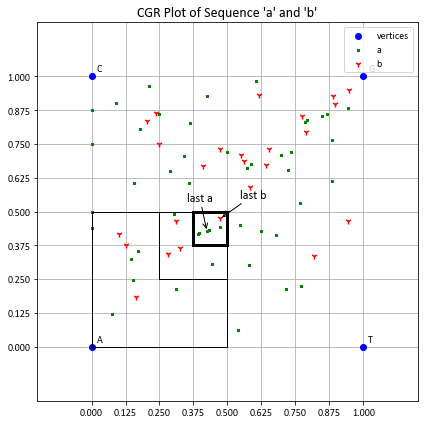

In [10]:
#generate 2d cgr instances for each seq
#ax3.cla()
cgr_a = pyusm.USM.cgr2d(a, A=A)
cgr_b = pyusm.USM.cgr2d(b, A=A)
cgr3, ax3 = plt.subplots(figsize=(6, 6))
ax3.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
ax3.scatter(x_vals, y_vals, c='b', label='vertices', marker="o")
for i, xy in enumerate(zip(x_vals, y_vals)):
    ax3.annotate(f'{labels[i]}', xy, xycoords='data', xytext=(5, 5), textcoords='offset pixels')
xa, ya = zip(*cgr_a.fw)
xb, yb = zip(*cgr_b.fw)
ax3.scatter(xa, ya, c='g', label='a', marker='s', s=6)
ax3.scatter(xb, yb, c='r', label='b', marker="1")

ax3.annotate('last a', cgr_a.fw[-1], xytext=(-20,30), textcoords='offset points', arrowprops=dict(arrowstyle='->'), fontsize=12)
ax3.annotate('last b', cgr_b.fw[-1], xytext=(20,20), textcoords='offset points', arrowprops=dict(arrowstyle='->'), fontsize=12)
plt.title("CGR Plot of Sequence 'a' and 'b'", fontsize=14)
# set suffix length to calculate subquadrant size
k=3
q = 2**(-k)
qx = np.linspace(0, 1, (2**k)+1)
plt.xticks(qx)
plt.yticks(qx)
ax3.grid()
ax3.set_axisbelow(True)
quad3 = patches.Rectangle((0.375, 0.375), q, q, linewidth='3', edgecolor='k', facecolor='none', label='')
quad1 = patches.Rectangle((0, 0), 2**-1, 2**-1, linewidth='1', edgecolor='k', facecolor='none')
quad2 = patches.Rectangle((0.25, 0.25), 2**-2, 2**-2, linewidth='1', edgecolor='k', facecolor='none')
ax3.add_patch(quad1)
ax3.add_patch(quad2)
ax3.add_patch(quad3)
ax3.legend()
plt.tight_layout()
plt.savefig("G:\My Drive\Dissertation Writings\Manuscript_2\CGR_suffix_plot.png", bbox_inches='tight')

In [12]:
with open(demo_files/'humhbb.txt', 'r') as fhand:
    seq = list(fhand.read())
A = {'A':(0, 0), 'C':(0, 1), 'G':(1, 1), 'T':(1, 0)}
hbbcgr = pyusm.USM.cgr2d(seq, A=A)

In [13]:
hbbcgr.coord_dict

{'A': (0, 0), 'C': (0, 1), 'G': (1, 1), 'T': (1, 0)}

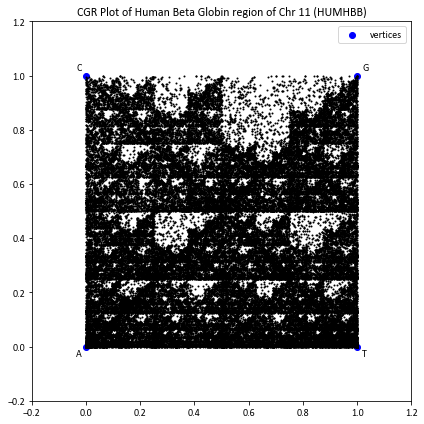

In [14]:
#get coordinate values of the vertices
labels, verts = zip(*hbbcgr.coord_dict.items())
x_vals, y_vals = zip(*verts)
x_vals = np.array(x_vals)
y_vals = np.array(y_vals)
# set up figure to hold our cgr
xmin = x_vals.min() - 0.2
xmax = x_vals.max() + 0.2
ymin = y_vals.min() - 0.2
ymax = y_vals.max() + 0.2

cgr, ax1 = plt.subplots(figsize=(6, 6))
ax1.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

#plot and label the vertices
ax1.scatter(x_vals, y_vals, c='b', label='vertices')
plt.title("CGR Plot of Human Beta Globin region of Chr 11 (HUMHBB)")
ax1.annotate('C', (0, 1), xycoords='data', xytext=(-10, 5), textcoords='offset pixels')
ax1.annotate('G', (1, 1), xycoords='data', xytext=(5, 5), textcoords='offset pixels')
ax1.annotate('T', (1, 0), xycoords='data', xytext=(5, -10), textcoords='offset pixels')
ax1.annotate('A', (0, 0), xycoords='data', xytext = (-10, -10), textcoords='offset pixels')
ax1.legend()
x_coords, y_coords = zip(*hbbcgr.fw)
ax1.scatter(x_coords, y_coords, s=1, c='k')
plt.tight_layout()
plt.savefig("G:\My Drive\Dissertation Writings\Manuscript_2\CGR_HUMHBB_plot.png", bbox_inches='tight')